In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup
import textwrap

In [3]:
pd.read_csv(
    "https://vincentarelbundock.github.io/Rdatasets/csv/dplyr/storms.csv", nrows=10
)

,rownames,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,1,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
1,2,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
2,3,Amy,1975,6,27,12,29.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
3,4,Amy,1975,6,27,18,30.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
4,5,Amy,1975,6,28,0,31.5,-78.8,tropical depression,NaN,25,1012,NaN,NaN
5,6,Amy,1975,6,28,6,32.4,-78.7,tropical depression,NaN,25,1012,NaN,NaN
6,7,Amy,1975,6,28,12,33.3,-78.0,tropical depression,NaN,25,1011,NaN,NaN
7,8,Amy,1975,6,28,18,34.0,-77.0,tropical depression,NaN,30,1006,NaN,NaN
8,9,Amy,1975,6,29,0,34.4,-75.8,tropical storm,NaN,35,1004,NaN,NaN
9,10,Amy,1975,6,29,6,34.0,-74.8,tropical storm,NaN,40,1002,NaN,NaN


In [23]:
import requests

url = "https://api.ons.gov.uk/timeseries/JP9Z/dataset/UNE/data"
response = requests.get(url)

if response.status_code == 200:
    try:
        json_data = response.json()
        # 处理 json_data
    except requests.exceptions.JSONDecodeError as e:
        print("JSON 解析错误:", e)
        print("响应内容:", response.text)
else:
    print("请求失败，状态码:", response.status_code)
    print("响应内容:", response.text)

请求失败，状态码: 404
响应内容: This API is being decommissioned as part of a suite of work to improve the digital products and services we offer. It is planned to be fully retired on 25/11/2024. If you have any queries please contact us at apiservice@ons.gov.uk.



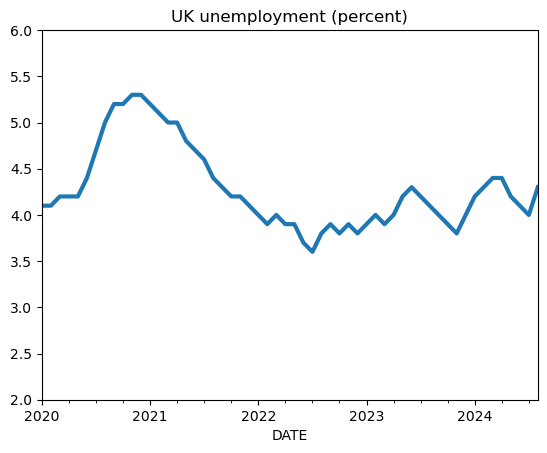

In [25]:
import pandas_datareader.data as web

df_u = web.DataReader("LRHUTTTTGBM156S", "fred")

df_u.plot(title="UK unemployment (percent)", legend=False, ylim=(2, 6), lw=3.0);

In [43]:
url = "http://aeturrell.com/research"
page = requests.get(url)
page.text[:300]

'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en" xml:lang="en"><head>\n\n<meta charset="utf-8">\n<meta name="generator" content="quarto-1.6.39">\n\n<meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=yes">\n\n<meta name="author" content="Arthur Turrell">\n'

In [45]:
soup = BeautifulSoup(page.text, "html.parser")
print(soup.prettify()[60000:60500])

TJDdmFjYW5jaWVzJTJDQ09WSUQtMTk=" data-index="1" data-listing-date-modified-sort="NaN" data-listing-date-sort="1651359600000" data-listing-file-modified-sort="1687564711698" data-listing-reading-time-sort="1" data-listing-word-count-sort="182">
         <div class="project-content listing-pub-info">
          <p>
           Draca, Mirko, Emma Duchini, Roland Rathelot, Arthur Turrell, and Giulia Vattuone. Revolution in Progress? The Rise of Remote Work in the UK.
           <i>
            Univers


In [47]:
# Get all paragraphs
all_paras = soup.find_all("p")
# Just show one of the paras
all_paras[1]

<p>Blundell, Jack, Emma Duchini, Stefania Simion, and Arthur Turrell. "Pay transparency and gender equality." <i>American Economic Journal: Economic Policy</i> (2024). doi: <a href="https://www.aeaweb.org/articles?id=10.1257/pol.20220766&amp;from=f"><code>10.1257/pol.20220766</code></a></p>

In [49]:
all_paras[1].text

'Blundell, Jack, Emma Duchini, Stefania Simion, and Arthur Turrell. "Pay transparency and gender equality." American Economic Journal: Economic Policy (2024). doi: 10.1257/pol.20220766'

In [57]:
df_list = pd.read_html(
    "https://simple.wikipedia.org/wiki/FIFA_World_Cup", match="Sweden"
)
# Retrieve first and only entry from list of dataframes
df = df_list[0]
df.head()

,Years,Hosts,Winners,Score,Runner's-up,Third place,Score.1,Fourth place
0,1930 Details,Uruguay,Uruguay,4 - 2,Argentina,United States,[note 1],Yugoslavia
1,1934 Details,Italy,Italy,2 - 1,Czechoslovakia,Germany,3 - 2,Austria
2,1938 Details,France,Italy,4 - 2,Hungary,Brazil,4 - 2,Sweden
3,1950 Details,Brazil,Uruguay,2 - 1,Brazil,Sweden,[note 2],Spain
4,1954 Details,Switzerland,West Germany,3 - 2,Hungary,Austria,3 - 1,Uruguay
